In [ ]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%cd drive/MyDrive/BEST/regression_data/

[Errno 2] No such file or directory: 'drive/MyDrive/BEST/regression_data/'
/content/drive/MyDrive/BEST/regression_data


In [ ]:
datas = []
for i in range(1, 31):
  datas.append(pd.DataFrame(pd.read_csv(f'{round(i*0.1, 1)}.csv')))

In [ ]:
datas[0]

,timeStamp,rssi
0,2022-07-28 20:24:40 +0000,-65.35325
1,2022-07-28 20:24:41 +0000,-65.32319
2,2022-07-28 20:24:42 +0000,-65.44927
3,2022-07-28 20:24:43 +0000,-200.00000
4,2022-07-28 20:24:44 +0000,-200.00000
...,...,...
189,2022-07-28 20:27:49 +0000,-200.00000
190,2022-07-28 20:27:50 +0000,-65.41531
191,2022-07-28 20:27:51 +0000,-65.38402
192,2022-07-28 20:27:52 +0000,-65.39764


In [ ]:
for i in range(1, len(datas)+1):
  datas[i-1].drop(['timeStamp'], axis=1, inplace = True)
  datas[i-1].insert(0, 'dist', (31 - i)*0.1)

In [ ]:
for data in datas:
  for column in data.columns[1:]:
    for i, rssi in enumerate(data[f"{column}"]):
      temp = 0
      if i == 0 :
        continue
      if data[f"{column}"][i] == -200 and data[f"{column}"][i-1] != -200:
        data[f"{column}"][i] = data[f"{column}"][i-1]

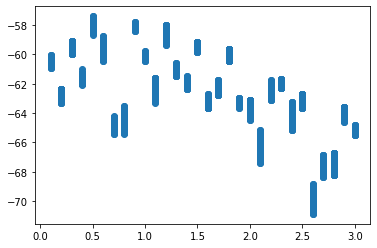

In [ ]:
result = pd.concat(datas)
plt.scatter(result['dist'], result[' rssi'])
plt.show()

Text(0.5, 1.0, 'rssi')

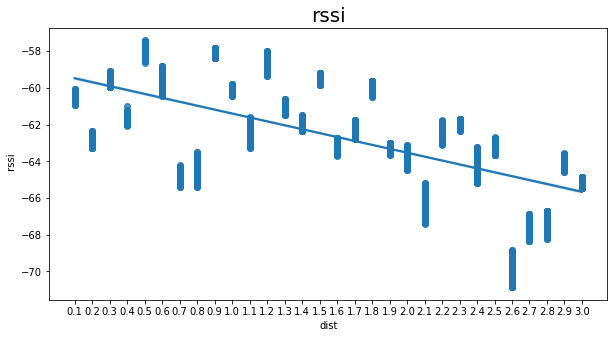

In [ ]:
ticks = [round((x*0.1), 1) for x in range(1, 31)]

fig = plt.subplots(1, 1, figsize=(10, 5))
ax1 = sns.regplot(x='dist', y=' rssi', data=result)
ax1.set_xticks(ticks)
ax1.set_title('rssi', size=20)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
np.set_printoptions(precision=2)
X = np.array(result[' rssi'])
y = np.array(result['dist']).reshape(-1, 1)

In [ ]:
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42,shuffle=True)

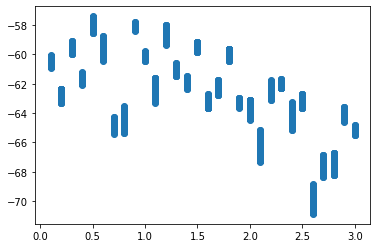

In [ ]:
plt.scatter(y_train, X_train)
plt.show()

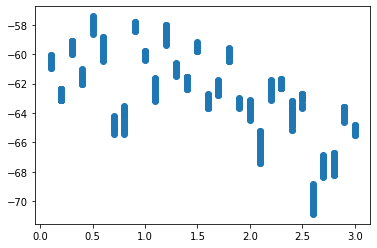

In [ ]:
plt.scatter(y_test, X_test)
plt.show()

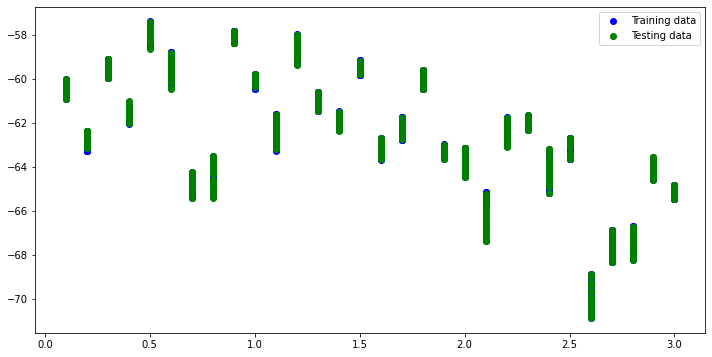

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(y_train, X_train, c='b',label='Training data')
plt.scatter(y_test, X_test, c='g',label='Testing data')
plt.legend()

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(64, activation = tf.keras.activations.relu, input_shape=[1]),
                             tf.keras.layers.Dense(64, activation = tf.keras.activations.relu),
                             tf.keras.layers.Dense(64, activation = tf.keras.activations.relu),                  
                             tf.keras.layers.Dense(1)
                            
])
compiled_model = model.compile(loss=tf.keras.losses.mean_squared_error, optimizer = tf.keras.optimizers.Adam(),
              metrics=['mae', 'mse'])

history = model.fit(X_train.reshape(-1,1), y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/50
132/132 [==============================] - 1s 5ms/step - loss: 0.7473 - mae: 0.7277 - mse: 0.7473 - val_loss: 0.7659 - val_mae: 0.7541 - val_mse: 0.7659
Epoch 2/50
132/132 [==============================] - 1s 4ms/step - loss: 0.7092 - mae: 0.7081 - mse: 0.7092 - val_loss: 0.6615 - val_mae: 0.6967 - val_mse: 0.6615
Epoch 3/50
132/132 [==============================] - 1s 4ms/step - loss: 0.6649 - mae: 0.6964 - mse: 0.6649 - val_loss: 0.7475 - val_mae: 0.7454 - val_mse: 0.7475
Epoch 4/50
132/132 [==============================] - 1s 5ms/step - loss: 0.6705 - mae: 0.7000 - mse: 0.6705 - val_loss: 0.6717 - val_mae: 0.7092 - val_mse: 0.6717
Epoch 5/50
132/132 [==============================] - 1s 4ms/step - loss: 0.6568 - mae: 0.6937 - mse: 0.6568 - val_loss: 0.6683 - val_mae: 0.7073 - val_mse: 0.6683
Epoch 6/50
132/132 [==============================] - 0s 3ms/step - loss: 0.6709 - mae: 0.6980 - mse: 0.6709 - val_loss: 0.6572 - val_mae: 0.6842 - val_mse: 0.6572
Epoch 7/50
132/1

In [ ]:
y_pred = model.predict(X_test)
model.summary()

def plot_preds(traindata = X_train,
               trainlabels = y_train,
               testdata = X_test,
               testlabels = y_test,
               predictions = y_pred):
  plt.figure(figsize=(12,6))
  plt.scatter(trainlabels, traindata, c="b", label="Training data")
  plt.scatter(testlabels, testdata, c="g", label="Testing data")
  plt.scatter(predictions, testdata,  c="r", label="Predictions")
  plt.legend()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                128       
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dense_27 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,513
Trainable params: 8,513
Non-trainable params: 0
_________________________________________________________________


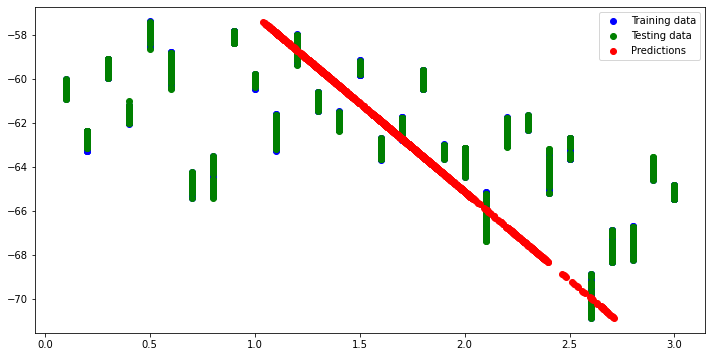

In [ ]:
plot_preds()

In [ ]:
#앞서 만든 기준 모델과 비교하기 위해 적은 수의 은닉 유닛을 가진 모델
tf.random.set_seed(42)
small_model = tf.keras.Sequential([
                            tf.keras.layers.Dense(4, activation = tf.keras.activations.relu, input_shape=[1]),
                             tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
                             tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),                  
                             tf.keras.layers.Dense(1)
                            
])
small_model.compile(loss=tf.keras.losses.mean_squared_error, optimizer = tf.keras.optimizers.Adam(),
              metrics=['mae', 'mse'])

smaller_history = small_model.fit(X_train.reshape(-1,1), y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/50
132/132 [==============================] - 3s 10ms/step - loss: 3.3779 - mae: 1.4541 - mse: 3.3779 - val_loss: 0.6833 - val_mae: 0.6921 - val_mse: 0.6833
Epoch 2/50
132/132 [==============================] - 1s 8ms/step - loss: 0.6519 - mae: 0.6871 - mse: 0.6519 - val_loss: 0.6633 - val_mae: 0.7014 - val_mse: 0.6633
Epoch 3/50
132/132 [==============================] - 1s 9ms/step - loss: 0.6461 - mae: 0.6890 - mse: 0.6461 - val_loss: 0.6650 - val_mae: 0.7033 - val_mse: 0.6650
Epoch 4/50
132/132 [==============================] - 1s 6ms/step - loss: 0.6463 - mae: 0.6894 - mse: 0.6463 - val_loss: 0.6641 - val_mae: 0.7025 - val_mse: 0.6641
Epoch 5/50
132/132 [==============================] - 1s 6ms/step - loss: 0.6459 - mae: 0.6897 - mse: 0.6459 - val_loss: 0.6590 - val_mae: 0.6957 - val_mse: 0.6590
Epoch 6/50
132/132 [==============================] - 1s 5ms/step - loss: 0.6456 - mae: 0.6881 - mse: 0.6456 - val_loss: 0.6613 - val_mae: 0.6998 - val_mse: 0.6613
Epoch 7/50
132/

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 4)                 8         
                                                                 
 dense_29 (Dense)            (None, 4)                 20        
                                                                 
 dense_30 (Dense)            (None, 4)                 20        
                                                                 
 dense_31 (Dense)            (None, 1)                 5         
                                                                 
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


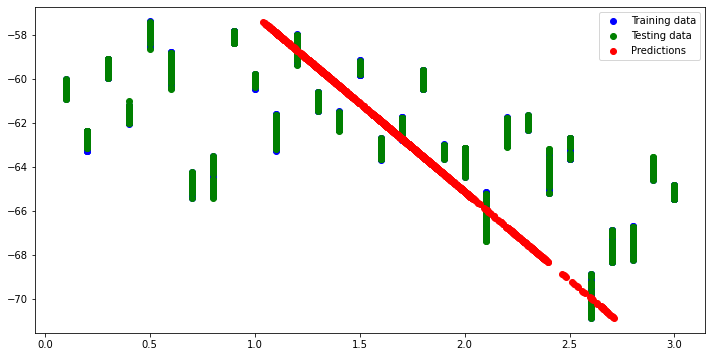

In [ ]:
small_model.summary()
plot_preds()

In [ ]:
# 과대적합 찾기
tf.random.set_seed(42)
bigger_model = tf.keras.Sequential([
                            tf.keras.layers.Dense(512, activation = tf.keras.activations.relu, input_shape=[1]),
                             tf.keras.layers.Dense(512, activation = tf.keras.activations.relu),
                             tf.keras.layers.Dense(512, activation = tf.keras.activations.relu),                  
                             tf.keras.layers.Dense(1)
                            
])
bigger_model.compile(loss=tf.keras.losses.mean_squared_error, optimizer = tf.keras.optimizers.Adam(),
              metrics=['mae', 'mse'])

bigger_history = bigger_model.fit(X_train.reshape(-1,1), y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/50
132/132 [==============================] - 2s 15ms/step - loss: 2.2687 - mae: 0.9659 - mse: 2.2687 - val_loss: 0.7521 - val_mae: 0.7477 - val_mse: 0.7521
Epoch 2/50
132/132 [==============================] - 2s 11ms/step - loss: 0.7106 - mae: 0.7106 - mse: 0.7106 - val_loss: 0.6749 - val_mae: 0.6933 - val_mse: 0.6749
Epoch 3/50
132/132 [==============================] - 2s 12ms/step - loss: 0.6653 - mae: 0.6974 - mse: 0.6653 - val_loss: 0.7254 - val_mae: 0.7360 - val_mse: 0.7254
Epoch 4/50
132/132 [==============================] - 2s 13ms/step - loss: 0.6719 - mae: 0.7005 - mse: 0.6719 - val_loss: 0.6821 - val_mae: 0.7152 - val_mse: 0.6821
Epoch 5/50
132/132 [==============================] - 2s 12ms/step - loss: 0.6560 - mae: 0.6938 - mse: 0.6560 - val_loss: 0.6652 - val_mae: 0.7040 - val_mse: 0.6652
Epoch 6/50
132/132 [==============================] - 2s 12ms/step - loss: 0.6654 - mae: 0.6972 - mse: 0.6654 - val_loss: 0.6566 - val_mae: 0.6945 - val_mse: 0.6566
Epoch 7/50

baseline
smaller
bigger


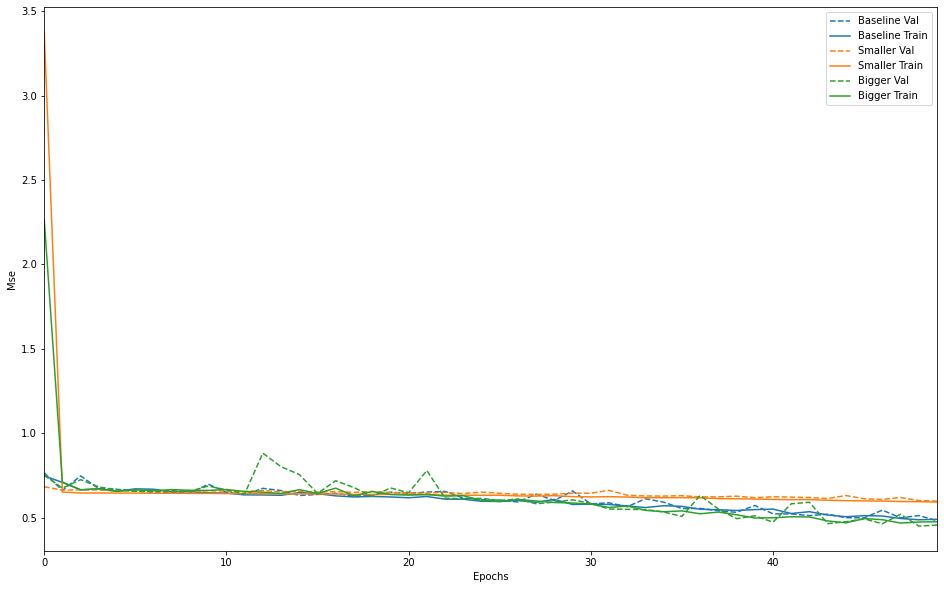

In [ ]:
def plot_history(histories, key='mse'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    print(history)
    print(name)
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])


In [ ]:
# weight
tf.random.set_seed(42)
L2_model = tf.keras.Sequential([
                            tf.keras.layers.Dense(64, activation = tf.keras.activations.relu,
                                                  kernel_regularizer=keras.regularizers.l2(0.001),  input_shape=[1]),
                             tf.keras.layers.Dense(64, activation = tf.keras.activations.relu,
                                                   kernel_regularizer=keras.regularizers.l2(0.001)),
                             tf.keras.layers.Dense(64, activation = tf.keras.activations.relu,
                                                   kernel_regularizer=keras.regularizers.l2(0.001)),                  
                             tf.keras.layers.Dense(1)
                            
])
L2_model.compile(loss=tf.keras.losses.mean_squared_error, optimizer = tf.keras.optimizers.Adam(),
              metrics=['mae', 'mse'])

L2_history = L2_model.fit(X_train.reshape(-1,1), y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/50
132/132 [==============================] - 1s 4ms/step - loss: 0.8199 - mae: 0.7283 - mse: 0.7475 - val_loss: 0.8027 - val_mae: 0.7521 - val_mse: 0.7616
Epoch 2/50
132/132 [==============================] - 1s 4ms/step - loss: 0.7404 - mae: 0.7073 - mse: 0.7070 - val_loss: 0.7177 - val_mae: 0.7185 - val_mse: 0.6882
Epoch 3/50
132/132 [==============================] - 0s 3ms/step - loss: 0.6950 - mae: 0.6972 - mse: 0.6663 - val_loss: 0.7700 - val_mae: 0.7427 - val_mse: 0.7419
Epoch 4/50
132/132 [==============================] - 0s 4ms/step - loss: 0.7096 - mae: 0.7040 - mse: 0.6818 - val_loss: 0.7022 - val_mae: 0.7111 - val_mse: 0.6747
Epoch 5/50
132/132 [==============================] - 0s 3ms/step - loss: 0.6851 - mae: 0.6940 - mse: 0.6578 - val_loss: 0.6948 - val_mae: 0.7069 - val_mse: 0.6677
Epoch 6/50
132/132 [==============================] - 0s 3ms/step - loss: 0.6927 - mae: 0.6960 - mse: 0.6658 - val_loss: 0.6763 - val_mae: 0.6869 - val_mse: 0.6497
Epoch 7/50
132/1

In [ ]:
# 과대적합 찾기
tf.random.set_seed(42)
middle_model = tf.keras.Sequential([
                            tf.keras.layers.Dense(256, activation = tf.keras.activations.relu, input_shape=[1]),
                             tf.keras.layers.Dense(256, activation = tf.keras.activations.relu),
                             tf.keras.layers.Dense(256, activation = tf.keras.activations.relu),                  
                             tf.keras.layers.Dense(1)
                            
])
middle_model.compile(loss=tf.keras.losses.mean_squared_error, optimizer = tf.keras.optimizers.Adam(),
              metrics=['mae', 'mse'])

middle_history = middle_model.fit(X_train.reshape(-1,1), y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/50
132/132 [==============================] - 1s 6ms/step - loss: 1.2888 - mae: 0.8623 - mse: 1.2888 - val_loss: 0.6704 - val_mae: 0.7057 - val_mse: 0.6704
Epoch 2/50
132/132 [==============================] - 1s 5ms/step - loss: 0.7372 - mae: 0.7219 - mse: 0.7372 - val_loss: 0.6999 - val_mae: 0.7240 - val_mse: 0.6999
Epoch 3/50
132/132 [==============================] - 1s 5ms/step - loss: 0.7081 - mae: 0.7135 - mse: 0.7081 - val_loss: 0.6608 - val_mae: 0.6966 - val_mse: 0.6608
Epoch 4/50
132/132 [==============================] - 1s 5ms/step - loss: 0.7023 - mae: 0.7109 - mse: 0.7023 - val_loss: 0.6936 - val_mae: 0.7207 - val_mse: 0.6936
Epoch 5/50
132/132 [==============================] - 1s 5ms/step - loss: 0.6657 - mae: 0.6975 - mse: 0.6657 - val_loss: 0.6684 - val_mae: 0.7070 - val_mse: 0.6684
Epoch 6/50
132/132 [==============================] - 1s 5ms/step - loss: 0.6764 - mae: 0.7002 - mse: 0.6764 - val_loss: 0.6639 - val_mae: 0.6861 - val_mse: 0.6639
Epoch 7/50
132/1

Dropout

In [ ]:
# weight
tf.random.set_seed(42)
dpt_model = tf.keras.Sequential([
                            tf.keras.layers.Dense(64, activation = tf.keras.activations.relu,  input_shape=[1]),
                            keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(64, activation = tf.keras.activations.relu),
                             keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(64, activation = tf.keras.activations.relu),  
                             keras.layers.Dropout(0.5),              
                             tf.keras.layers.Dense(1)
                            
])
dpt_model.compile(loss=tf.keras.losses.mean_squared_error, optimizer = tf.keras.optimizers.Adam(),
              metrics=['mae', 'mse'])

dpt_history = dpt_model.fit(X_train.reshape(-1,1), y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/50
132/132 [==============================] - 1s 6ms/step - loss: 17.8830 - mae: 3.0243 - mse: 17.8830 - val_loss: 3.0418 - val_mae: 1.5171 - val_mse: 3.0418
Epoch 2/50
132/132 [==============================] - 1s 4ms/step - loss: 3.5861 - mae: 1.4950 - mse: 3.5861 - val_loss: 2.6797 - val_mae: 1.3916 - val_mse: 2.6797
Epoch 3/50
132/132 [==============================] - 0s 3ms/step - loss: 2.2512 - mae: 1.1997 - mse: 2.2512 - val_loss: 2.2914 - val_mae: 1.2585 - val_mse: 2.2914
Epoch 4/50
132/132 [==============================] - 0s 3ms/step - loss: 1.6931 - mae: 1.0430 - mse: 1.6931 - val_loss: 1.9183 - val_mae: 1.1315 - val_mse: 1.9183
Epoch 5/50
132/132 [==============================] - 0s 3ms/step - loss: 1.4144 - mae: 0.9620 - mse: 1.4144 - val_loss: 1.7190 - val_mae: 1.0653 - val_mse: 1.7190
Epoch 6/50
132/132 [==============================] - 0s 4ms/step - loss: 1.2846 - mae: 0.9256 - mse: 1.2846 - val_loss: 1.4881 - val_mae: 0.9863 - val_mse: 1.4881
Epoch 7/50
132

baseline
middle
L2


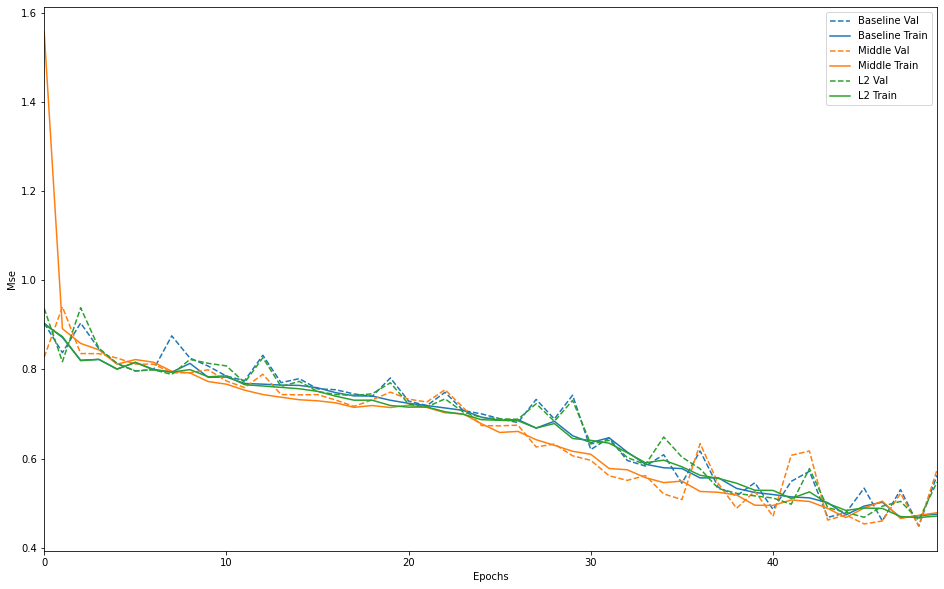

In [ ]:
plot_history([('baseline', history),
              ('middle', middle_history),
              ('L2', L2_history)])

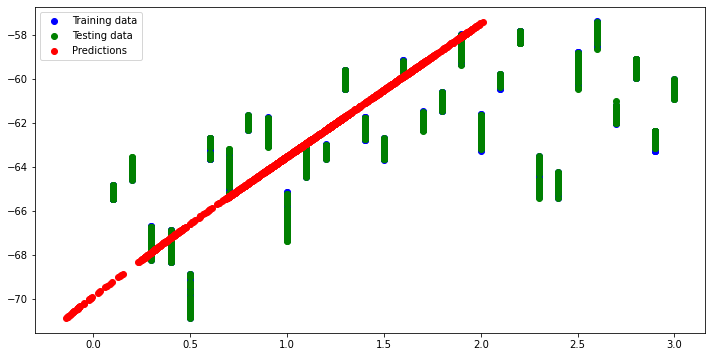

In [ ]:
plot_preds(traindata = X_train, trainlabels = y_train, testdata = X_test, testlabels = y_test, predictions = y_pred)

In [ ]:
score = model.evaluate(X_test, y_test, batch_size=32)

57/57 [==============================] - 0s 1ms/step - loss: 0.5625 - mae: 0.5672 - mse: 0.5625


# Keras Tuner

In [ ]:
import IPython

In [ ]:
!pip install -q -U keras-tuner
import kerastuner as kt

     |████████████████████████████████| 135 kB 5.2 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


In [ ]:
def model_builder(hp):
   model = keras.Sequential()
    
   # 첫번째 Dense 레이어 32~512까지 노드 수 조정
   hp_unit = hp.Int('units', min_value=32, max_value=256, step=32)
   model.add(tf.keras.layers.Dense(units=hp_unit, activation='relu'))
   model.add(tf.keras.layers.Dense(units=hp_unit, activation='relu'))
   model.add(tf.keras.layers.Dense(units=hp_unit, activation='relu'))
   model.add(keras.layers.Dense(1))
  
   # 학습률(learning rate)을 조정[0.01, 0.001, 0.0001]
   # hp.choice: 그 list 안에서 뽑는다.
   hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 

   opt = keras.optimizers.Adam(learning_rate=hp_learning_rate)
   loss = tf.keras.losses.mean_squared_error
   model.compile(optimizer= opt, loss=loss, metrics=['mse'])

   return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_mse', 
                     max_epochs = 30,
                     factor=3,
                     hyperband_iterations=2,
                     directory = 'my_dir',
                     project_name = 'iOS')

In [ ]:
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [ ]:
tuner.search(X_train.reshape(-1, 1), y_train, epochs = 50, validation_data = (X_test, y_test), callbacks = [ClearTrainingOutput()])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 22 Complete [00h 00m 01s]
val_mse: 0.5553023815155029

Best val_mse So Far: 0.5511124730110168
Total elapsed time: 00h 01m 00s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 64 and the optimal learning rate for the optimizer
is 0.01.



In [ ]:
model_based_tuner = tuner.hypermodel.build(best_hps)
model_based_tuner.fit(X_train.reshape(-1,1), y_train, batch_size=32, epochs=50, validation_data=(X_train,y_train))

Epoch 1/50
22/22 [==============================] - 1s 14ms/step - loss: 9.8097 - mse: 9.8097 - val_loss: 0.5922 - val_mse: 0.5922
Epoch 2/50
22/22 [==============================] - 0s 5ms/step - loss: 0.6663 - mse: 0.6663 - val_loss: 0.7098 - val_mse: 0.7098
Epoch 3/50
22/22 [==============================] - 0s 4ms/step - loss: 0.6557 - mse: 0.6557 - val_loss: 0.6356 - val_mse: 0.6356
Epoch 4/50
22/22 [==============================] - 0s 4ms/step - loss: 0.6220 - mse: 0.6220 - val_loss: 0.6194 - val_mse: 0.6194
Epoch 5/50
22/22 [==============================] - 0s 8ms/step - loss: 0.6372 - mse: 0.6372 - val_loss: 0.6162 - val_mse: 0.6162
Epoch 6/50
22/22 [==============================] - 0s 8ms/step - loss: 0.6085 - mse: 0.6085 - val_loss: 0.6036 - val_mse: 0.6036
Epoch 7/50
22/22 [==============================] - 0s 6ms/step - loss: 0.5981 - mse: 0.5981 - val_loss: 0.5902 - val_mse: 0.5902
Epoch 8/50
22/22 [==============================] - 0s 6ms/step - loss: 0.6348 - mse: 0.6

In [ ]:
model_based_tuner.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                128       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,513
Trainable params: 8,513
Non-trainable params: 0
_________________________________________________________________


In [ ]:
score = model_based_tuner.evaluate(X_test, y_test, batch_size=32)

10/10 [==============================] - 0s 7ms/step - loss: 0.4535 - mse: 0.4535


In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model_based_tuner)
tflite_model = converter.convert()

# Save the model.
with open('model/model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpc1m2fnym/assets


In [ ]:
interpreter = tf.lite.Interpreter(model_path="model/model.tflite")
interpreter.allocate_tensors()

# Print input shape and type
inputs = interpreter.get_input_details()
print('{} input(s):'.format(len(inputs)))
for i in range(0, len(inputs)):
    print('{} {}'.format(inputs[i]['shape'], inputs[i]['dtype']))

# Print output shape and type
outputs = interpreter.get_output_details()
print('\n{} output(s):'.format(len(outputs)))
for i in range(0, len(outputs)):
    print('{} {}'.format(outputs[i]['shape'], outputs[i]['dtype']))

1 input(s):
[1 1] <class 'numpy.float32'>

1 output(s):
[1 1] <class 'numpy.float32'>
